In [1]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.filterwarnings("ignore", message="`distplot` is a deprecated function")

In [2]:
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['font.size'] = 12
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams['axes.unicode_minus'] = False

In [3]:
filename = './../../data/human_info.csv'

welfare = pd.read_csv(filename, encoding = 'cp949')
welfare

,gender,age,marriage,religion,income
0,남자,40,이혼,있슴,135
1,남자,40,이혼,있슴,196
2,남자,40,이혼,있슴,193
3,남자,40,이혼,없슴,159
4,남자,40,이혼,없슴,195
...,...,...,...,...,...
16654,여자,69,미혼,없슴,163
16655,여자,69,미혼,없슴,114
16656,여자,69,미혼,없슴,182
16657,여자,69,미혼,없슴,139


<Axes: title={'center': '결혼 유무에 따른 빈도'}, xlabel='marriage', ylabel='count'>

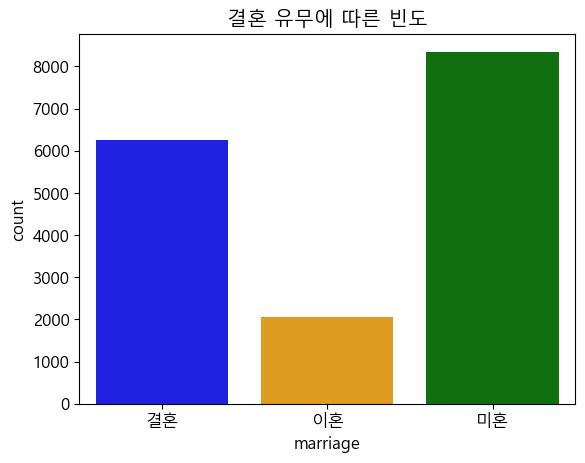

In [4]:
ORDERING = ['결혼', '이혼', '미혼']
COLORS = ['blue', 'orange', 'green']
plt.figure()
plt.title('결혼 유무에 따른 빈도')
sns.countplot(x = 'marriage', data = welfare, order = ORDERING, palette = COLORS)

In [6]:
welfare['religion'] = welfare['religion'].replace({'있슴': '있음'})
welfare['religion'] = welfare['religion'].replace({'없슴': '없음'})
welfare['religion'].unique()

array(['있음', '없음'], dtype=object)

<Axes: title={'center': '결혼 유무 vs 종교 유무 빈도'}, xlabel='marriage', ylabel='count'>

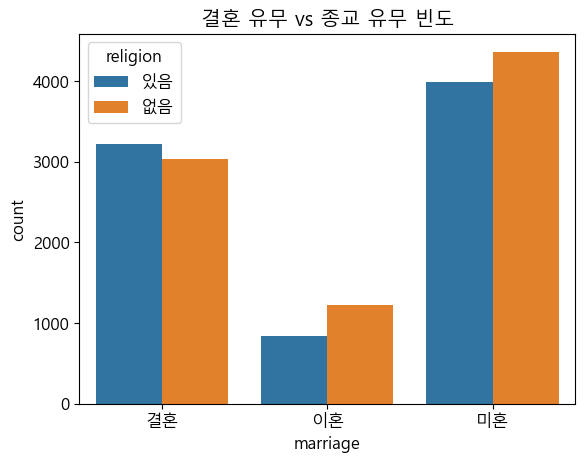

In [7]:
plt.figure()
plt.title('결혼 유무 vs 종교 유무 빈도')

sns.countplot(x = 'marriage', hue = 'religion', data = welfare, order = ORDERING)

C:\Users\KH302\AppData\Local\Temp\ipykernel_7380\2721600649.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(welfare['age'], rug = False, hist = True, kde = True)


<Axes: title={'center': 'kde 와 histogram'}, xlabel='age', ylabel='Density'>

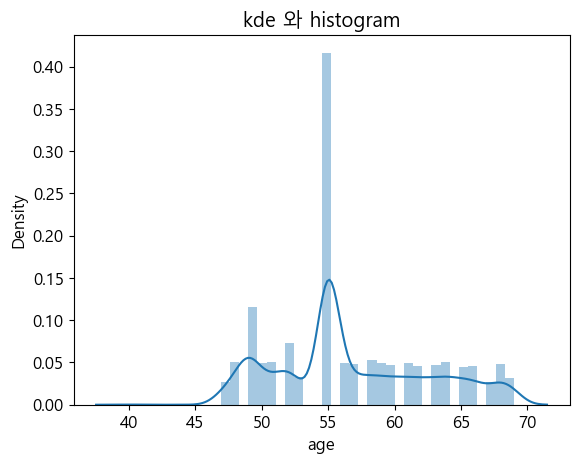

In [8]:
plt.figure()
plt.title('kde 와 histogram')
sns.distplot(welfare['age'], rug = False, hist = True, kde = True)

<Axes: title={'center': '결혼 유무와 성별에 대한 히트맵'}, xlabel='marriage', ylabel='gender'>

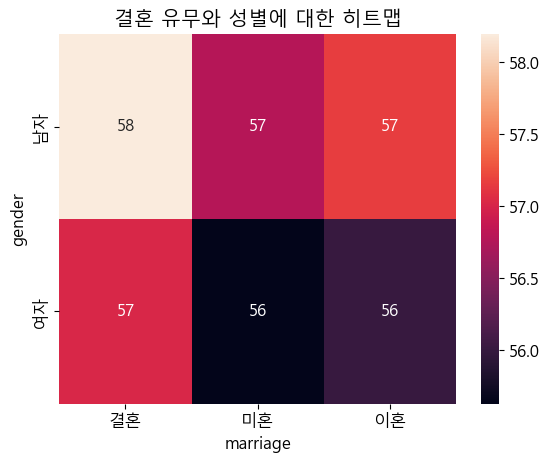

In [12]:
pivot = welfare.pivot_table(index = 'gender', columns = 'marriage', values = 'age')

plt.figure()
plt.title('결혼 유무와 성별에 대한 히트맵')
sns.heatmap(data = pivot, annot = True)

<Axes: title={'center': '상관 관계 시각화'}>

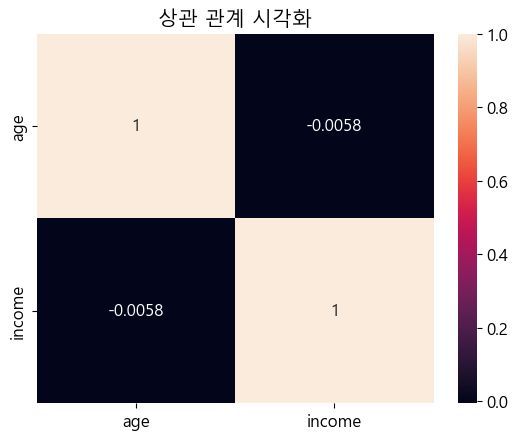

In [15]:
cor = welfare.corr(numeric_only=True)
cor_subset = cor[['age', 'income']].loc[['age', 'income']]

plt.figure()
plt.title('상관 관계 시각화')
sns.heatmap(data = cor_subset, annot = True)

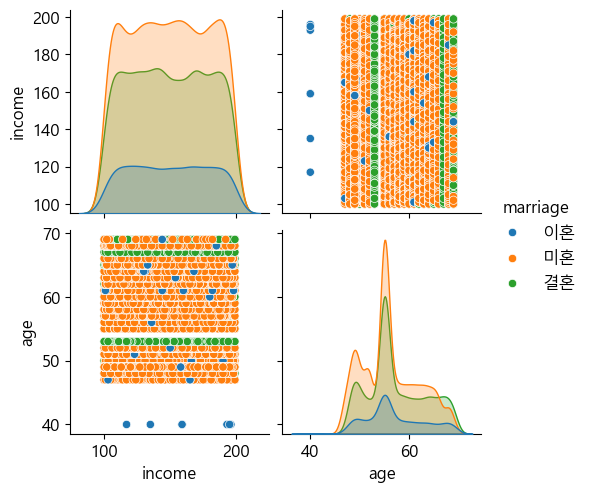

In [18]:
newwelfare = welfare.loc[:, ['income', 'age', 'marriage']]

sns.pairplot(data = newwelfare, hue = 'marriage')

<Axes: title={'center': '나이에 대한 바이올린 그래프'}, xlabel='age'>

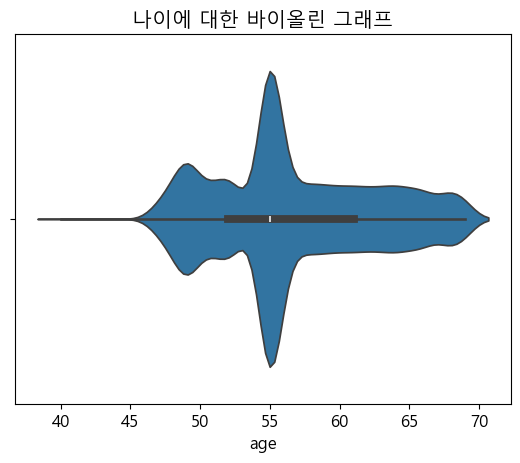

In [19]:
plt.figure()
plt.title('나이에 대한 바이올린 그래프')
sns.violinplot(x = 'age', data = welfare)

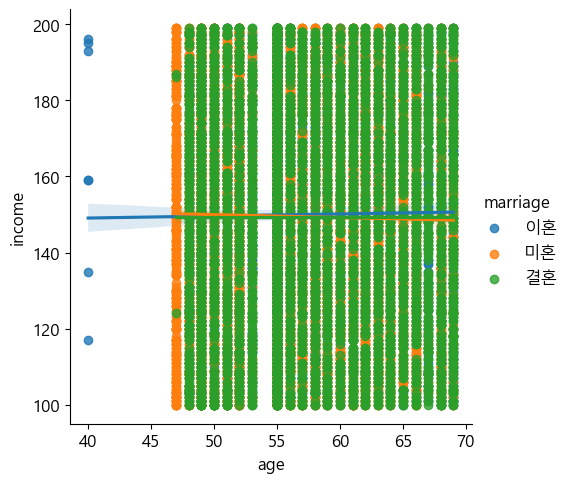

In [20]:
sns.lmplot(x = 'age', y = 'income', hue = 'marriage', data = welfare)

In [29]:
def newAge(x) :
    if x < 30 :
        return '청년'
    elif 30 <= x < 60 :
        return '중년'
    else :
        return '노년'

welfare['ageg'] = welfare['age'].apply(newAge)

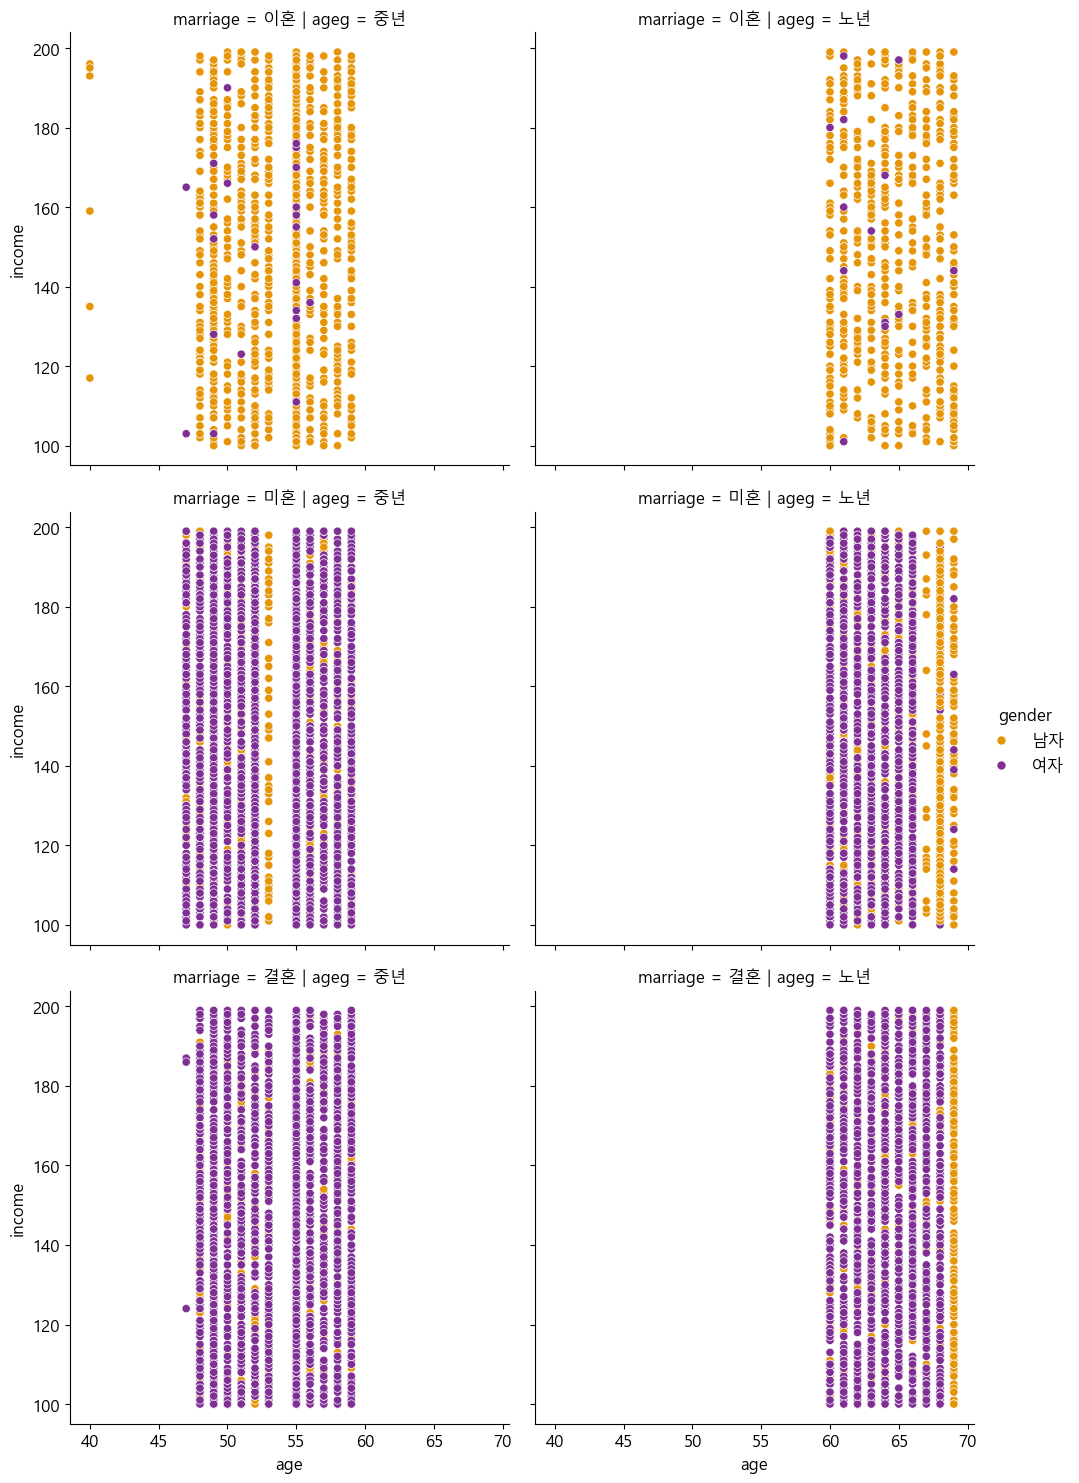

In [31]:
sns.relplot(x = 'age', y = 'income', hue = 'gender', row = 'ageg', col = 'marriage', data = welfare, palette = 'CMRmap_r')

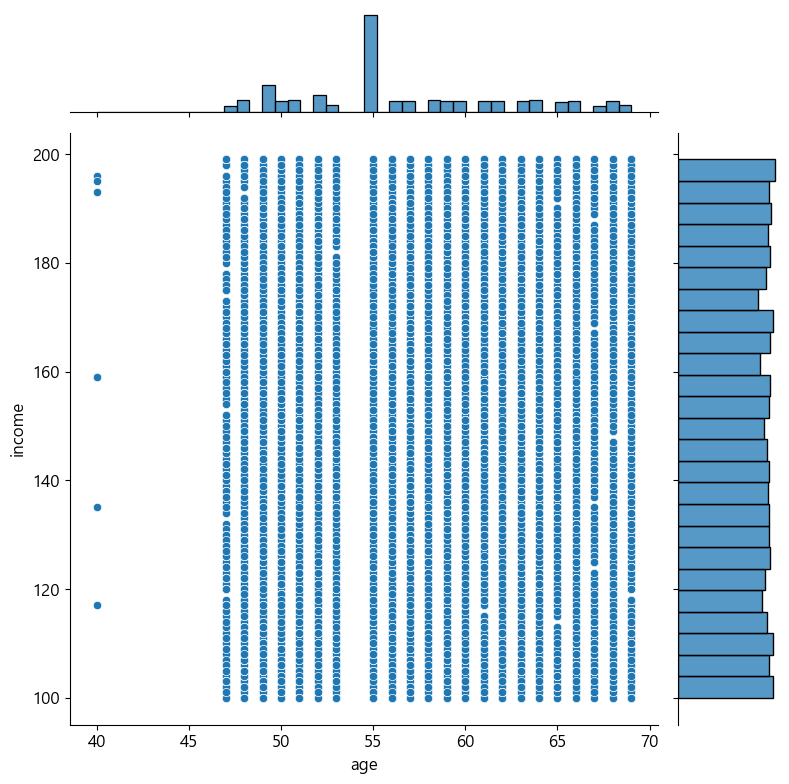

In [32]:
sns.jointplot(x = 'age', y = 'income', height = 8, data = welfare)

Text(0, 0.5, 'gender')

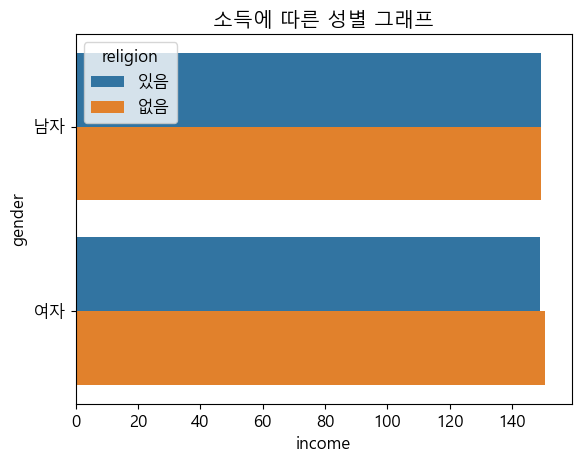

In [33]:
ax = plt.subplots()
ax = sns.barplot(x = 'income', y = 'gender', hue = 'religion', data = welfare, errwidth = 0)
ax.set_title('소득에 따른 성별 그래프')
ax.set_xlabel('income')
ax.set_ylabel('gender')